In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
NUM_CITIES = 10
POPULATION_SIZE = 20
GENERATIONS = 100
MUTATION_RATE = 0.01

In [3]:
# Generate random cities
cities = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(NUM_CITIES)}

In [4]:
cities

{0: (61, 90),
 1: (6, 51),
 2: (71, 10),
 3: (48, 2),
 4: (18, 47),
 5: (44, 68),
 6: (4, 19),
 7: (56, 77),
 8: (0, 53),
 9: (11, 18)}

In [5]:
# Calculate distance between two cities
def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

In [6]:
distance(cities[0], cities[1])

np.float64(67.42403132415029)

In [7]:
# Initialize population
def create_individual():
    individual = list(cities.keys())
    random.shuffle(individual)
    return individual

In [8]:
create_individual()

[6, 4, 2, 5, 0, 1, 9, 8, 7, 3]

In [9]:
create_individual()

[2, 9, 0, 8, 3, 6, 1, 4, 5, 7]

In [10]:
create_individual()

[3, 1, 2, 7, 6, 4, 5, 8, 0, 9]

In [11]:
def create_population():
    return [create_individual() for _ in range(POPULATION_SIZE)]

In [12]:
create_population()

[[7, 2, 6, 4, 3, 0, 5, 1, 8, 9],
 [3, 4, 7, 5, 9, 2, 8, 1, 6, 0],
 [8, 2, 5, 1, 4, 6, 9, 3, 0, 7],
 [9, 6, 8, 0, 1, 2, 7, 4, 3, 5],
 [1, 3, 9, 8, 6, 4, 7, 2, 0, 5],
 [8, 7, 2, 3, 4, 9, 0, 5, 1, 6],
 [0, 8, 3, 4, 2, 5, 1, 6, 7, 9],
 [3, 1, 2, 7, 5, 0, 6, 9, 4, 8],
 [6, 9, 0, 3, 2, 1, 7, 5, 8, 4],
 [4, 8, 9, 2, 1, 3, 6, 7, 0, 5],
 [6, 0, 3, 7, 4, 9, 2, 1, 8, 5],
 [1, 6, 7, 9, 3, 8, 5, 4, 0, 2],
 [9, 0, 4, 2, 8, 6, 3, 1, 5, 7],
 [7, 6, 1, 3, 9, 5, 4, 2, 0, 8],
 [7, 1, 6, 9, 8, 2, 4, 3, 0, 5],
 [4, 6, 2, 3, 1, 0, 7, 8, 5, 9],
 [6, 1, 7, 0, 4, 3, 8, 9, 2, 5],
 [1, 2, 6, 9, 3, 4, 5, 7, 0, 8],
 [6, 8, 5, 7, 0, 4, 1, 3, 9, 2],
 [6, 4, 7, 8, 9, 2, 3, 0, 5, 1]]

In [15]:
# Calculate total distance of a route
def total_distance(route):
    return sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route) - 1)) + distance(cities[route[-1]], cities[route[0]])

In [16]:
# Fitness function
def fitness(individual):
    return 1 / total_distance(individual)

In [17]:
fitness(create_individual())

np.float64(0.0020788092007118786)

In [36]:
# Selection
def select_parents(population, fitnesses):
    total_fitness = sum(fitnesses)
    probabilities = [f / total_fitness for f in fitnesses]
    parents = random.choices(population, weights=probabilities, k=2)
    return parents

In [39]:
select_parents(['A','B','C','D','F'],[10,2,1,8,2])

['A', 'D']

In [22]:
# Crossover
def crossover(parent1, parent2):
    child = [None] * NUM_CITIES
    start, end = sorted(random.sample(range(NUM_CITIES), 2))
    child[start:end] = parent1[start:end]
    for i in range(NUM_CITIES):
        if child[i] is None:
            for gene in parent2:
                if gene not in child:
                    child[i] = gene
                    break
    return child
crossover([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],[1, 4, 9, 8, 7, 6, 5, 3, 2 ,0])

[0, 1, 4, 9, 8, 7, 6, 5, 3, 2]

In [23]:
# Crossover
def crossover(parent1, parent2):
    child = [None] * NUM_CITIES
    start, end = sorted(random.sample(range(NUM_CITIES), 2))
    print(start)
    print(end)
    child[start:end] = parent1[start:end]
    print(child)
    for i in range(NUM_CITIES):
        if child[i] is None:
            for gene in parent2:
                if gene not in child:
                    child[i] = gene
                    break
    return child 

In [24]:
crossover([0,1,2,3,4,5,6,7,8,9],[9,8,7,6,5,4,3,2,1,0])

1
4
[None, 1, 2, 3, None, None, None, None, None, None]


[9, 1, 2, 3, 8, 7, 6, 5, 4, 0]

In [25]:
# Crossover
def crossover2(parent1, parent2):
    child1 = [None] * NUM_CITIES
    child2 = [None] * NUM_CITIES
    start, end = sorted(random.sample(range(NUM_CITIES), 2))
    child1[start:end] = parent1[start:end]
    # First parent
    for i in range(NUM_CITIES):
        if child1[i] is None:
            for gene in parent2:
                if gene not in child1:
                    child1[i] = gene
                    break
    # Second Parent
    start, end = sorted(random.sample(range(NUM_CITIES), 2))
    child2[start:end] = parent2[start:end]
    for i in range(NUM_CITIES):
        if child2[i] is None:
            for gene in parent1:
                if gene not in child2:
                    child2[i] = gene
                    break
    return child1,child2
crossover2([0,1,2,3,4,5,6,7,8,9],[9,8,7,6,5,4,3,2,1,0])

([9, 8, 7, 3, 6, 5, 4, 2, 1, 0], [0, 8, 7, 1, 2, 3, 4, 5, 6, 9])

In [26]:
# Crossover
def crossover(parent1, parent2):
    child = [None] * NUM_CITIES
    start, end = sorted(random.sample(range(NUM_CITIES), 2))
    child[start:end] = parent1[start:end]
    for i in range(NUM_CITIES):
        if child[i] is None:
            for gene in parent2:
                if gene not in child:
                    child[i] = gene
                    break
    return child

In [29]:
# Mutation
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            j = random.randint(0, len(individual) - 1)
            individual[i], individual[j] = individual[j], individual[i]
    return individual
    
mutate(list(range(10)))

[0, 1, 2, 3, 4, 7, 6, 5, 8, 9]

In [33]:
# Genetic Algorithm
def genetic_algorithm():
    population = create_population()
    for generation in range(GENERATIONS):
        fitnesses = [fitness(individual) for individual in population]
        new_population = []
        for _ in range(POPULATION_SIZE // 2):
            parent1, parent2 = select_parents(population, fitnesses)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.extend([mutate(child1), mutate(child2)])
        population = new_population
        best_individual = min(population, key=total_distance)
        print(f"Generation {generation}: Best Distance = {total_distance(best_individual)}")
    return best_individual

In [34]:
# Function to draw cities and the best route
def draw_cities_and_route(cities, best_route):
    x = [cities[i][0] for i in range(NUM_CITIES)]
    y = [cities[i][1] for i in range(NUM_CITIES)]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c='red', marker='o')
    
    # Draw the best route
    for i in range(len(best_route)):
        start_city = cities[best_route[i]]
        end_city = cities[best_route[(i + 1) % len(best_route)]]
        plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], 'b-')
    
    # Annotate cities with their indices
    for i in range(NUM_CITIES):
        plt.text(cities[i][0], cities[i][1], str(i), fontsize=12, ha='right')
    
    plt.title("TSP - Best Route Found by Genetic Algorithm")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()

In [40]:
# Run the algorithm
best_route = genetic_algorithm()
print("Best Route:", best_route)
print("Best Distance:", total_distance(best_route))

Generation 0: Best Distance = 374.7184080221332
Generation 1: Best Distance = 374.575300273556
Generation 2: Best Distance = 322.77683850205665
Generation 3: Best Distance = 380.95002460414986
Generation 4: Best Distance = 438.08967541286853
Generation 5: Best Distance = 390.25012137427115
Generation 6: Best Distance = 390.25012137427115
Generation 7: Best Distance = 359.2717453402701
Generation 8: Best Distance = 355.61636358597457
Generation 9: Best Distance = 368.119882570704
Generation 10: Best Distance = 356.78372363583685
Generation 11: Best Distance = 388.0055009163451
Generation 12: Best Distance = 432.8813237335655
Generation 13: Best Distance = 405.35315796709614
Generation 14: Best Distance = 405.35315796709614
Generation 15: Best Distance = 365.22324144014806
Generation 16: Best Distance = 375.96113258007205
Generation 17: Best Distance = 343.72286270674766
Generation 18: Best Distance = 347.35994868691625
Generation 19: Best Distance = 373.5734249468662
Generation 20: Best

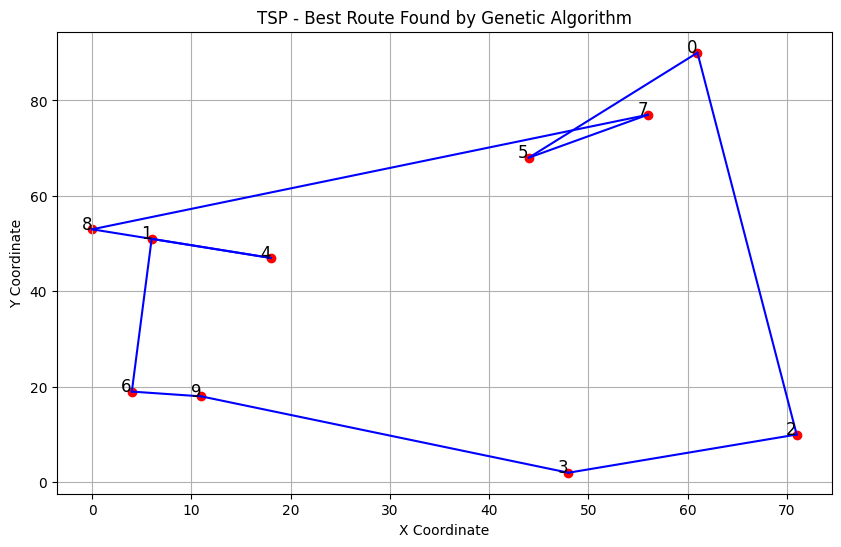

In [41]:
# Draw cities and the best route
draw_cities_and_route(cities, best_route)

In [42]:
cities = {0 : (0,0),
          1 : (100,0),
          2 : (100,100),
          3 : (0,100)}
NUM_CITIES = len(cities)

In [43]:
# Run the algorithm
best_route = genetic_algorithm()
print("Best Route:", best_route)
print("Best Distance:", total_distance(best_route))

Generation 0: Best Distance = 400.0
Generation 1: Best Distance = 400.0
Generation 2: Best Distance = 400.0
Generation 3: Best Distance = 400.0
Generation 4: Best Distance = 400.0
Generation 5: Best Distance = 400.0
Generation 6: Best Distance = 400.0
Generation 7: Best Distance = 400.0
Generation 8: Best Distance = 400.0
Generation 9: Best Distance = 400.0
Generation 10: Best Distance = 400.0
Generation 11: Best Distance = 400.0
Generation 12: Best Distance = 400.0
Generation 13: Best Distance = 400.0
Generation 14: Best Distance = 400.0
Generation 15: Best Distance = 400.0
Generation 16: Best Distance = 400.0
Generation 17: Best Distance = 400.0
Generation 18: Best Distance = 400.0
Generation 19: Best Distance = 400.0
Generation 20: Best Distance = 400.0
Generation 21: Best Distance = 400.0
Generation 22: Best Distance = 400.0
Generation 23: Best Distance = 400.0
Generation 24: Best Distance = 400.0
Generation 25: Best Distance = 400.0
Generation 26: Best Distance = 400.0
Generation 

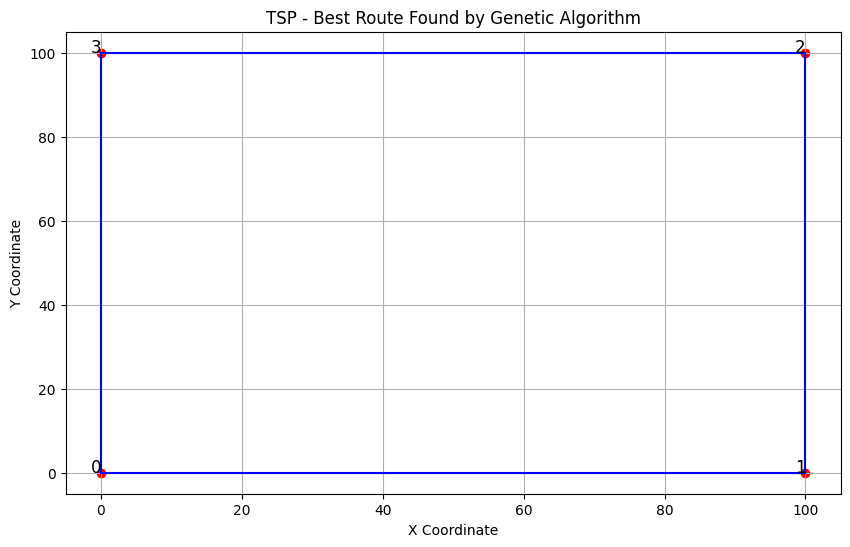

In [44]:
# Draw cities and the best route
draw_cities_and_route(cities, best_route)